In [ ]:
# Insira seu project token aqui

# MARATONA BEHIND THE CODE 2020

## DESAFIO 7 - TNT

<hr>

## Installing Libs

In [ ]:
!pip install scikit-learn --upgrade

In [ ]:
!pip install xgboost --upgrade

In [ ]:
!pip install imblearn --upgrade

In [ ]:
!pip3 install cloudant

<hr>

## Download dos conjuntos de dados em formato .csv

In [1]:
import pandas as pd
from cloudant import Cloudant

In [2]:
u = "d5aed30c-4651-48f7-96bd-bd6030237e2a-bluemix"
p = "cfad465a453fad58b800c37b2393f2cd348e34b2451b0b5d217a7bf001b63fea"
a = "d5aed30c-4651-48f7-96bd-bd6030237e2a-bluemix"
client = Cloudant(u, p, account=a, connect=True, auto_renew=True)

In [3]:
db = client[ "thop-iot" ]

In [43]:
response = db.all_docs(include_docs=True)

docs = []
for r in response['rows']:
    docs.append(r['doc'])
type(docs)

list

In [44]:
# Insira aqui o pandasDataFrame.
df = pd.DataFrame(data=docs)

df["LAT"] = df["LAT"].astype(float)
df["LONG"] = df["LONG"].astype(float)

df.head()

,_id,_rev,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,...,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET,row,topic,payload,qos,retain
0,000ac62b7850525df9febd4a670e232e,1-6b1e474a57f306eee38b93d5acb6a3cb,2018-5-18,Trianon-Masp,-23.5634,-46.6544,45104,34,62,27,...,13,36,13,29,NORMAL,1578.0,NaN,NaN,NaN,NaN
1,000ac62b7850525df9febd4a6713dcd3,1-1b7cc2fea69a48354a3e488bf6207a97,2019-11-30,Tamanduateí,-23.5929,-46.5897,53360,74,49,65,...,37,3,28,16,NORMAL,3570.0,NaN,NaN,NaN,NaN
2,000ac62b7850525df9febd4a671540dc,1-240fe2514c177df92a1e8627a39fcdf5,2019-12-25,Tamanduateí,-23.5929,-46.5897,51358,3,37,30,...,15,43,6,4,REABASTECER,3595.0,NaN,NaN,NaN,NaN
3,000ac62b7850525df9febd4a671a2cd9,1-950bd3e3f0c02b57c0b82013515ac220,2018-3-8,Sé,-23.5500,-46.6333,193499,8,49,65,...,4,19,39,35,NORMAL,3668.0,NaN,NaN,NaN,NaN
4,000ac62b7850525df9febd4a671a76fa,1-fbc82cb0ec755b94613c520249702ceb,2018-11-2,Trianon-Masp,-23.5634,-46.6544,42740,70,18,8,...,31,43,26,3,NORMAL,1742.0,NaN,NaN,NaN,NaN


In [45]:
df.shape

(96096, 21)

In [46]:
df_distinct = df.drop_duplicates("row")

In [47]:
df_distinct.shape

(16967, 21)

In [48]:
df_training_dataset = df_distinct
df_training_dataset.tail()

,_id,_rev,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,...,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET,row,topic,payload,qos,retain
95312,fe8dd76a254af59c21cff4b282338152,1-ddce07dc9d5b99c74c882f6eaac1bb85,2019-11-26,Eucaliptos,-23.6100,-46.6686,22948,14,37,17,...,20,39,38,35,NORMAL,16526.0,NaN,NaN,NaN,NaN
95653,ff1ac8ddb6089b3b0f807cac5afeb3df,1-286f834bd54bf1d2e65e050a0c482656,2018-11-15,Brooklin,-23.6263,-46.6878,26358,77,65,40,...,37,5,22,15,REABASTECER,14715.0,NaN,NaN,NaN,NaN
95784,ff735fe43dcbfa6883e5e248a26703e8,1-f17e0826e82d579d1757f46e7439abf1,2019-10-2,Vila Mariana,-23.5895,-46.6346,24381,11,2,45,...,5,10,1,35,REABASTECER,14312.0,NaN,NaN,NaN,NaN
95824,ff7793fd597fe16312c68ab016238fb7,1-a524509adb3d47b461a9e9d17c84641d,2018-12-29,Tatuapé,-23.5402,-46.5765,68232,66,42,19,...,35,14,38,43,NORMAL,6119.0,NaN,NaN,NaN,NaN
96078,ffa585d17afd4af1f818b16265b2d654,1-ea08432ad049096c56281e0c22a61b9b,2019-8-6,Campo Belo,-23.6188,-46.6823,24573,28,55,65,...,31,28,39,15,NORMAL,15696.0,NaN,NaN,NaN,NaN


In [49]:
df_training_dataset.to_csv("dataset.csv", index=False)

Sobre o arquivo "training_dataset.csv", temos algumas informações gerais sobre os usuários do app do BanCoppel:

**Tempo**

**Estação**

**LAT**

**LONG**

**Movimentação**

**Original_473**

**Original_269**

**Zero**

**Maçã-Verde**

**Tangerina**

**Citrus**

**Açaí-Guaraná**

**Pêssego**

**TARGET**

In [50]:
df_training_dataset = df_training_dataset.sort_values("row")
df_training_dataset = df_training_dataset[["Tempo", "Estação", "LAT", "LONG", "Movimentação", "Original_473",
                                          "Original_269", "Zero", "Maçã-Verde", "Tangerina", "Citrus", "Açaí-Guaraná",
                                          "Pêssego", "TARGET"]]
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16967 entries, 27531 to 10321
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tempo         16966 non-null  object 
 1   Estação       16966 non-null  object 
 2   LAT           16966 non-null  float64
 3   LONG          16966 non-null  float64
 4   Movimentação  16966 non-null  object 
 5   Original_473  16966 non-null  object 
 6   Original_269  16966 non-null  object 
 7   Zero          16966 non-null  object 
 8   Maçã-Verde    16966 non-null  object 
 9   Tangerina     16966 non-null  object 
 10  Citrus        16966 non-null  object 
 11  Açaí-Guaraná  16966 non-null  object 
 12  Pêssego       16966 non-null  object 
 13  TARGET        16966 non-null  object 
dtypes: float64(2), object(12)
memory usage: 1.9+ MB


In [51]:
df_training_dataset.nunique()

Tempo             720
Estação            25
LAT                25
LONG               25
Movimentação    14831
Original_473       81
Original_269       65
Zero               63
Maçã-Verde         43
Tangerina          42
Citrus             43
Açaí-Guaraná       42
Pêssego            42
TARGET              2
dtype: int64

<hr>

## Detalhamento do desafio: classificação binária

Este é um desafio cujo objetivo de negócio é a segmentação dos usuários de aplicativo de um banco. Para tal, podemos utilizar duas abordagens: aprendizado de máquina supervisionado (classificação) ou não-supervisionado (clustering). Neste desafio será aplicada a classificação, pois é disponível um dataset já com "labels", ou em outras palavras, já com exemplos de dados juntamente com a variável alvo.

Na biblioteca scikit-learn temos diversos algoritmos para classificação. O participante é livre para utilizar o framework que desejar para completar esse desafio.

Neste notebook será mostrado um exeplo de uso do algoritmo "Decision Tree" para classificar parte dos estudantes em seis diferentes perfís.

# Atenção!

A coluna-alvo neste desafio é a coluna ``TARGET``

<hr>

## Pre-processando o dataset antes do treinamento

### Processando valores NaN com o SimpleImputer do sklearn

Para os valores NaN, usaremos a substituição pela constante 0 como **exemplo**.

Você pode escolher a estratégia que achar melhor para tratar os valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [52]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value=0,
    verbose=0,
    copy=True
)

In [53]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

# Aplicando a transformação ``SimpleImputer`` no conjunto de dados base
impute_zeros.fit(X=df_training_dataset)

# Reconstruindo um Pandas DataFrame com os resultados
df_training_dataset_imputed = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_training_dataset
    ),
    columns=df_training_dataset.columns
)

# Eliminar linha com zero
df_training_dataset_imputed = df_training_dataset_imputed[(df_training_dataset_imputed[["Estação", "Tempo"]] != 0).all(axis=1)]

# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação SimpleImputer: \n\n{}\n".format(df_training_dataset_imputed.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação SimpleImputer: 

Tempo           1
Estação         1
LAT             1
LONG            1
Movimentação    1
Original_473    1
Original_269    1
Zero            1
Maçã-Verde      1
Tangerina       1
Citrus          1
Açaí-Guaraná    1
Pêssego         1
TARGET          1
dtype: int64

Valores nulos no df_training_dataset após a transformação SimpleImputer: 

Tempo           0
Estação         0
LAT             0
LONG            0
Movimentação    0
Original_473    0
Original_269    0
Zero            0
Maçã-Verde      0
Tangerina       0
Citrus          0
Açaí-Guaraná    0
Pêssego         0
TARGET          0
dtype: int64



### Eliminando colunas indesejadas

Vamos **demonstrar** abaixo como usar o método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [54]:
df_training_dataset_imputed.tail()

,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET
16961,2019-12-26,Hospital São Paulo,-23.5984,-46.6455,25702,53,54,26,38,23,25,11,37,NORMAL
16962,2019-12-27,Hospital São Paulo,-23.5984,-46.6455,26236,43,52,17,33,18,21,5,35,REABASTECER
16963,2019-12-28,Hospital São Paulo,-23.5984,-46.6455,27174,34,50,9,28,15,16,43,32,NORMAL
16964,2019-12-29,Hospital São Paulo,-23.5984,-46.6455,26877,22,47,65,27,11,16,39,30,NORMAL
16965,2019-12-30,Hospital São Paulo,-23.5984,-46.6455,26759,9,42,56,22,8,10,35,26,NORMAL


In [55]:
df_training_dataset_rmcolumns = df_training_dataset_imputed.drop(columns=['LAT', 'LONG'], inplace=False)

# Atenção!

As colunas removidas acima são apenas para fim de exemplo, você pode usar as colunas que quiser e inclusive criar novas colunas com dados que achar importantes!


### Tratamento de de variáveis categóricas

Como mencionado antes, os computadores não são bons com variáveis "categóricas" (ou strings).

Dado uma coluna com variável categórica, o que podemos realizar é a codificação dessa coluna em múltiplas colunas contendo variáveis binárias. Esse processo é chamado de "one-hot-encoding" ou "dummy encoding". Se você não é familiarizado com esses termos, você pode pesquisar mais sobre isso na internet :)

In [17]:
# Tratando variáveis categóricas com o método Pandas ``get_dummies()''
# df_training = pd.get_dummies(df_training_dataset_rmcolumns, columns=['Variável a ser aplicado método getDumies()'])
# df_training = df_training_dataset_rmcolumns
# df_training.tail()

# Atenção!

A coluna **TARGET** deve ser mantida como uma string. Você não precisa processar/codificar a variável-alvo.

<hr>

## Treinando um classificador com base em uma árvore de decisão

### Selecionando FEATURES e definindo a variável TARGET

In [56]:
df_training_dataset_rmcolumns.tail(20)

,Tempo,Estação,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET
16946,2019-12-11,Hospital São Paulo,25311,30,14,58,37,38,33,26,13,NORMAL
16947,2019-12-12,Hospital São Paulo,25341,23,8,52,34,34,29,24,7,NORMAL
16948,2019-12-13,Hospital São Paulo,27771,16,65,47,34,30,26,21,2,NORMAL
16949,2019-12-14,Hospital São Paulo,27743,6,57,42,34,25,22,16,43,NORMAL
16950,2019-12-15,Hospital São Paulo,24357,86,49,36,28,22,20,11,41,NORMAL
16951,2019-12-16,Hospital São Paulo,27837,79,46,26,24,20,17,7,36,NORMAL
16952,2019-12-17,Hospital São Paulo,26853,69,38,22,22,18,13,2,31,NORMAL
16953,2019-12-18,Hospital São Paulo,26636,59,34,12,22,16,11,43,25,NORMAL
16954,2019-12-19,Hospital São Paulo,27365,47,30,5,19,11,7,38,22,REABASTECER
16955,2019-12-20,Hospital São Paulo,26406,34,26,65,13,8,2,35,19,NORMAL


In [57]:
df_training_dataset_rmcolumns["Tempo"] = pd.to_datetime(df_training_dataset_rmcolumns["Tempo"], format='%Y-%m-%d', errors='coerce')
df_training_dataset_rmcolumns["Workdays"] = np.where(df_training_dataset_rmcolumns["Tempo"].dt.dayofweek < 5, "Workday", "Weekend")

In [58]:
df_training_dataset_rmcolumns.head()

,Tempo,Estação,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET,Workdays
0,2018-01-01,Paraíso,70277,86,65,65,43,43,43,43,43,NORMAL,Workday
1,2018-01-02,Paraíso,73302,73,58,58,38,37,42,41,39,NORMAL,Workday
2,2018-01-03,Paraíso,71711,64,50,50,33,34,42,39,35,NORMAL,Workday
3,2018-01-04,Paraíso,71740,52,48,42,27,29,36,37,32,NORMAL,Workday
4,2018-01-05,Paraíso,71035,41,40,32,21,23,36,34,26,NORMAL,Workday


In [59]:
df_training_dataset_rmcolumns["Movimentação"] = df_training_dataset_rmcolumns["Movimentação"].astype(int)
df_training_dataset_rmcolumns["LAST_MOV"] = df_training_dataset_rmcolumns.groupby(['Estação'])['Movimentação'].shift()
df_training_dataset_rmcolumns["DIFF_LAST_MOV"] = df_training_dataset_rmcolumns.groupby(['Estação'])["LAST_MOV"].diff()
df_training_dataset_rmcolumns.tail()

,Tempo,Estação,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET,Workdays,LAST_MOV,DIFF_LAST_MOV
16961,2019-12-26,Hospital São Paulo,25702,53,54,26,38,23,25,11,37,NORMAL,Workday,25250.0,-1117.0
16962,2019-12-27,Hospital São Paulo,26236,43,52,17,33,18,21,5,35,REABASTECER,Workday,25702.0,452.0
16963,2019-12-28,Hospital São Paulo,27174,34,50,9,28,15,16,43,32,NORMAL,Weekend,26236.0,534.0
16964,2019-12-29,Hospital São Paulo,26877,22,47,65,27,11,16,39,30,NORMAL,Weekend,27174.0,938.0
16965,2019-12-30,Hospital São Paulo,26759,9,42,56,22,8,10,35,26,NORMAL,Workday,26877.0,-297.0


In [60]:
df_training_dataset_rmcolumns["Original_473"] = df_training_dataset_rmcolumns["Original_473"].astype(int)
df_training_dataset_rmcolumns["Original_269"] = df_training_dataset_rmcolumns["Original_269"].astype(int)
df_training_dataset_rmcolumns["Zero"] = df_training_dataset_rmcolumns["Zero"].astype(int)
df_training_dataset_rmcolumns["Maçã-Verde"] = df_training_dataset_rmcolumns["Maçã-Verde"].astype(int)
df_training_dataset_rmcolumns["Tangerina"] = df_training_dataset_rmcolumns["Tangerina"].astype(int)
df_training_dataset_rmcolumns["Citrus"] = df_training_dataset_rmcolumns["Citrus"].astype(int)
df_training_dataset_rmcolumns["Açaí-Guaraná"] = df_training_dataset_rmcolumns["Açaí-Guaraná"].astype(int)
df_training_dataset_rmcolumns["Pêssego"] = df_training_dataset_rmcolumns["Pêssego"].astype(int)
df_training_dataset_rmcolumns["Estação"] = df_training_dataset_rmcolumns["Estação"].astype("category")
df_training_dataset_rmcolumns["Workdays"] = df_training_dataset_rmcolumns["Workdays"].astype("category")

In [61]:
df_training = df_training_dataset_rmcolumns.copy()
df_training.columns

Index(['Tempo', 'Estação', 'Movimentação', 'Original_473', 'Original_269',
       'Zero', 'Maçã-Verde', 'Tangerina', 'Citrus', 'Açaí-Guaraná', 'Pêssego',
       'TARGET', 'Workdays', 'LAST_MOV', 'DIFF_LAST_MOV'],
      dtype='object')

In [62]:
df_training.dropna(inplace=True)

In [63]:
features = df_training[
    [
        'Estação', 'Workdays', 'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego', 'LAST_MOV', 'DIFF_LAST_MOV'
    ]
]
target = df_training['TARGET']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.

In [64]:
features.dtypes

Estação          category
Workdays         category
Original_473        int64
Original_269        int64
Zero                int64
Maçã-Verde          int64
Tangerina           int64
Citrus              int64
Açaí-Guaraná        int64
Pêssego             int64
LAST_MOV          float64
DIFF_LAST_MOV     float64
dtype: object

### Dividindo nosso conjunto de dados em conjuntos de treinamento e teste

In [65]:
from sklearn import preprocessing

num_d = features.select_dtypes(exclude=['category'])

sc = preprocessing.StandardScaler().fit(num_d)
num_d.columns

Index(['Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego', 'LAST_MOV', 'DIFF_LAST_MOV'],
      dtype='object')

In [66]:
features[num_d.columns] = sc.transform(num_d)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [67]:
features.head()

,Estação,Workdays,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,LAST_MOV,DIFF_LAST_MOV
2,Paraíso,Workday,0.674622,0.748329,0.756116,0.722664,0.824199,1.462393,1.229798,0.907390,0.127176,1.843034
3,Paraíso,Workday,0.204270,0.641771,0.337112,0.225286,0.418640,0.964750,1.067650,0.663384,0.090864,-0.969586
4,Paraíso,Workday,-0.226886,0.215539,-0.186643,-0.272091,-0.068030,0.964750,0.824428,0.175372,0.091526,0.017512
5,Paraíso,Weekend,-0.618845,-0.050856,-0.500895,-0.354987,-0.473589,0.881810,0.500132,-0.068634,0.075435,-0.429729
6,Paraíso,Weekend,-0.893217,-0.370530,-0.867524,-0.852365,-0.635813,0.467108,0.175836,-0.312640,0.121699,1.234933


In [68]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC
# from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1006)

smc = SMOTENC(categorical_features=[0, 1], random_state=1006)
# smc = SMOTE(random_state=1006)

X_train, y_train = smc.fit_resample(X_train, y_train)

### Treinando uma árvore de decisão

In [69]:
# Método para criar um árvore de decisão
from lightgbm import LGBMClassifier

dtc = LGBMClassifier(learning_rate=0.001, n_estimators=10000)
dtc.fit(X_train, y_train, categorical_feature=["Estação", "Workdays"])
#dtc.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


LGBMClassifier(learning_rate=0.001, n_estimators=10000)

### Fazendo previsões na amostra de teste

In [73]:
y_pred = dtc.predict(X_test)
print(y_pred)

['NORMAL' 'REABASTECER' 'REABASTECER' ... 'REABASTECER' 'REABASTECER'
 'NORMAL']


### Analisando a qualidade do modelo através da matriz de confusão

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(9, 9))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

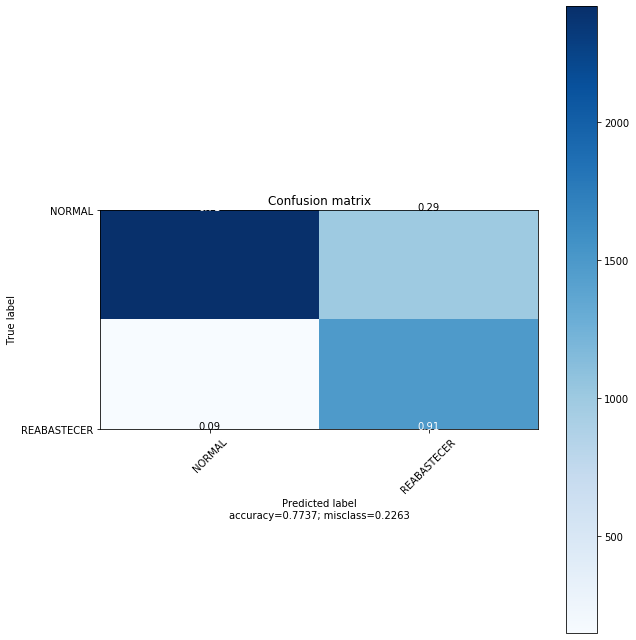

In [75]:
from sklearn.metrics import confusion_matrix


plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])

In [76]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      NORMAL       0.94      0.71      0.81      3413
 REABASTECER       0.60      0.91      0.72      1634

    accuracy                           0.77      5047
   macro avg       0.77      0.81      0.77      5047
weighted avg       0.83      0.77      0.78      5047



<hr>

## Scoring dos dados necessários para entregar a solução

Como entrega da sua solução, esperamos os resultados classificados no seguinte dataset chamado "to_be_scored.csv":

### Download da "folha de respostas"

In [268]:
!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

--2020-09-09 01:35:53--  https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
Resolvendo gitlab.com (gitlab.com)... 2606:4700:90:0:f22e:fbec:5bed:a9b9, 172.65.251.78
Conectando-se a gitlab.com (gitlab.com)|2606:4700:90:0:f22e:fbec:5bed:a9b9|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: não especificada [text/plain]
Salvando em: “to_be_scored.csv”

to_be_scored.csv        [ <=>                ]  68,64K  --.-KB/s    em 0,02s   

2020-09-09 01:35:54 (3,56 MB/s) - “to_be_scored.csv” salvo [70291]



,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego
979,2019-8-19,Hospital São Paulo,-23.5984,-46.6455,26787,34,65,28,17,33,27,6,2
980,2019-8-20,Hospital São Paulo,-23.5984,-46.6455,26629,21,60,18,15,27,22,43,43
981,2019-8-21,Hospital São Paulo,-23.5984,-46.6455,27517,9,56,13,14,21,17,37,37
982,2019-8-22,Hospital São Paulo,-23.5984,-46.6455,26860,86,49,7,14,17,12,33,33
983,2019-8-23,Hospital São Paulo,-23.5984,-46.6455,24571,74,41,65,8,14,7,27,27


In [ ]:
#df_to_be_scored = pd.read_csv('to_be_scored.csv')
#df_to_be_scored.tail()

# Atenção!

O dataframe ``to_be_scored`` é a sua "folha de respostas". Note que a coluna "TARGET" não existe nessa amostra, que não pode ser então utilizada para treino de modelos de aprendizado supervisionado.

In [269]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tempo         984 non-null    object 
 1   Estação       984 non-null    object 
 2   LAT           984 non-null    float64
 3   LONG          984 non-null    float64
 4   Movimentação  984 non-null    int64  
 5   Original_473  984 non-null    int64  
 6   Original_269  984 non-null    int64  
 7   Zero          984 non-null    int64  
 8   Maçã-Verde    984 non-null    int64  
 9   Tangerina     984 non-null    int64  
 10  Citrus        984 non-null    int64  
 11  Açaí-Guaraná  984 non-null    int64  
 12  Pêssego       984 non-null    int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 100.1+ KB


<hr>

# Atenção!

# Para poder aplicar seu modelo e classificar a folha de respostas, você precisa primeiro aplicar as mesmas transformações com colunas que você aplicou no dataset de treino.

# Não remova ou adicione linhas na folha de respostas. 

# Não altere a ordem das linhas na folha de respostas.

# Ao final, as 1000 entradas devem estar classificadas, com os valores previstos em uma coluna chamada "target"

<hr>

Na célula abaixo, repetimos rapidamente os mesmos passos de pré-processamento usados no exemplo dado com árvore de decisão

In [293]:
# 1 - Removendo linhas com valores NaN
df_to_be_scored_1 = df_to_be_scored.dropna(axis='index', how='any', subset=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação', 'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina', 'Citrus', 'Açaí-Guaraná', 'Pêssego'])

# 2 - Inputando zeros nos valores faltantes
impute_zeros.fit(X=df_to_be_scored_1)
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_to_be_scored_1
    ),
    columns=df_to_be_scored_1.columns
)

# 3 - Remoção de colunas
df_to_be_scored_3 = df_to_be_scored_2.drop(columns=['LAT', 'LONG'], inplace=False)

# 4 - Encoding com "dummy variables" (se necessário)
# df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_3, columns=['Váriavel com dummy'])
# df_to_be_scored_4 = df_to_be_scored_3

df_to_be_scored_4 = df_to_be_scored_3.copy()

df_to_be_scored_4["Tempo"] = pd.to_datetime(df_to_be_scored_4["Tempo"], format='%Y-%m-%d', errors='coerce')
df_to_be_scored_4["Workdays"] = np.where(df_to_be_scored_4["Tempo"].dt.dayofweek < 5, "Workday", "Weekend")
df_to_be_scored_4["Estação"] = df_to_be_scored_4["Estação"].astype("category")
df_to_be_scored_4["Workdays"] = df_to_be_scored_4["Workdays"].astype("category")
df_to_be_scored_4["Movimentação"] = df_to_be_scored_4["Movimentação"].astype(int)
df_to_be_scored_4["LAST_MOV"] = df_to_be_scored_4.groupby(['Estação'])['Movimentação'].shift()
df_to_be_scored_4["DIFF_LAST_MOV"] = df_to_be_scored_4.groupby(['Estação'])["LAST_MOV"].diff()
df_to_be_scored_4['LAST_MOV'] = df_to_be_scored_4['LAST_MOV'].fillna(0)
df_to_be_scored_4['DIFF_LAST_MOV'] = df_to_be_scored_4['DIFF_LAST_MOV'].fillna(0)
df_to_be_scored_4.drop(['Tempo', 'Movimentação'], axis='columns', inplace=True)

num_d = df_to_be_scored_4.select_dtypes(exclude=['category'])
sc = preprocessing.StandardScaler().fit(num_d)
df_to_be_scored_4[num_d.columns] = sc.transform(num_d)

In [294]:
df_to_be_scored_4.tail()

,Estação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,Workdays,LAST_MOV,DIFF_LAST_MOV
979,Hospital São Paulo,-0.509509,1.541083,-0.396499,-0.647231,0.747451,0.228536,-1.464583,-1.752136,Workday,0.586011,0.052785
980,Hospital São Paulo,-1.019019,1.275714,-0.917261,-0.812653,0.258752,-0.189300,1.534267,1.577343,Workday,0.989007,0.916679
981,Hospital São Paulo,-1.489335,1.063418,-1.177642,-0.895365,-0.229947,-0.607137,1.047967,1.090102,Workday,0.946586,-0.099775
982,Hospital São Paulo,1.528528,0.691902,-1.490099,-0.895365,-0.555746,-1.024973,0.723767,0.765275,Workday,1.185001,0.541099
983,Hospital São Paulo,1.058212,0.267311,1.530320,-1.391631,-0.800095,-1.442809,0.237467,0.278034,Workday,1.008607,-0.405508


In [295]:
df_to_be_scored_4.dtypes

Estação          category
Original_473      float64
Original_269      float64
Zero              float64
Maçã-Verde        float64
Tangerina         float64
Citrus            float64
Açaí-Guaraná      float64
Pêssego           float64
Workdays         category
LAST_MOV          float64
DIFF_LAST_MOV     float64
dtype: object

<hr>

Pode ser verificado abaixo que as colunas da folha de resposta agora são idênticas às que foram usadas para treinar o modelo:

In [296]:
df_training[
    [
          'Estação', 'Workdays', 'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego', 'LAST_MOV', 'DIFF_LAST_MOV'
    ]
].columns

Index(['Estação', 'Workdays', 'Original_473', 'Original_269', 'Zero',
       'Maçã-Verde', 'Tangerina', 'Citrus', 'Açaí-Guaraná', 'Pêssego',
       'LAST_MOV', 'DIFF_LAST_MOV'],
      dtype='object')

In [297]:
df_to_be_scored_4.columns

Index(['Estação', 'Original_473', 'Original_269', 'Zero', 'Maçã-Verde',
       'Tangerina', 'Citrus', 'Açaí-Guaraná', 'Pêssego', 'Workdays',
       'LAST_MOV', 'DIFF_LAST_MOV'],
      dtype='object')

# Atenção

Para todas colunas que não existirem no "df_to_be_scored", você pode usar a técnica abaixo para adicioná-las:

In [298]:
y_pred = dtc.predict(df_to_be_scored_4)
df_to_be_scored_4['TARGET'] = y_pred
df_to_be_scored_4.tail()

,Estação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,Workdays,LAST_MOV,DIFF_LAST_MOV,TARGET
979,Hospital São Paulo,-0.509509,1.541083,-0.396499,-0.647231,0.747451,0.228536,-1.464583,-1.752136,Workday,0.586011,0.052785,REABASTECER
980,Hospital São Paulo,-1.019019,1.275714,-0.917261,-0.812653,0.258752,-0.189300,1.534267,1.577343,Workday,0.989007,0.916679,NORMAL
981,Hospital São Paulo,-1.489335,1.063418,-1.177642,-0.895365,-0.229947,-0.607137,1.047967,1.090102,Workday,0.946586,-0.099775,NORMAL
982,Hospital São Paulo,1.528528,0.691902,-1.490099,-0.895365,-0.555746,-1.024973,0.723767,0.765275,Workday,1.185001,0.541099,REABASTECER
983,Hospital São Paulo,1.058212,0.267311,1.530320,-1.391631,-0.800095,-1.442809,0.237467,0.278034,Workday,1.008607,-0.405508,REABASTECER


### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [300]:
df_to_be_scored_4.to_csv("results.csv", index=False)

# Atenção

# A execução da célula acima irá criar um novo "data asset" no seu projeto no Watson Studio. Você precisará realizar o download deste arquivo juntamente com este notebook e criar um arquivo zip com os arquivos **results.csv** e **notebook.ipynb** para submissão. (os arquivos devem estar nomeados desta forma)

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

# https://tnt.maratona.dev
